In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Exploratory Data Analysis

In [410]:
df = pd.read_csv('global_ai_ml_data_salaries.csv')

Create pandas Dataframe by reading the CSV file using pandas method

In [411]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Business Intelligence,84021,USD,84021,CA,0,CA,M
1,2024,MI,FT,Business Intelligence,69000,USD,69000,CA,0,CA,M
2,2024,SE,FT,BI Developer,241600,USD,241600,US,0,US,M
3,2024,SE,FT,BI Developer,109800,USD,109800,US,0,US,M
4,2024,SE,FT,Machine Learning Modeler,245400,USD,245400,US,100,US,M


Check the First 5 of the dataframe

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19775 entries, 0 to 19774
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           19775 non-null  int64 
 1   experience_level    19775 non-null  object
 2   employment_type     19775 non-null  object
 3   job_title           19775 non-null  object
 4   salary              19775 non-null  int64 
 5   salary_currency     19775 non-null  object
 6   salary_in_usd       19775 non-null  int64 
 7   employee_residence  19775 non-null  object
 8   remote_ratio        19775 non-null  int64 
 9   company_location    19775 non-null  object
 10  company_size        19775 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.7+ MB


No Missing Value/Null Value in this dataset

In [413]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Checked it again and there are 19775 values in all columns , so no need to drop any columns or rows or fill any values

In [414]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,19775.000000,1.977500e+04,19775.000000,19775.000000
mean,2023.353527,1.628728e+05,150935.295322,29.886220
std,0.712468,3.128112e+05,68561.127186,45.427765
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.039770e+05,103200.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,189650.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


# Data Visualization

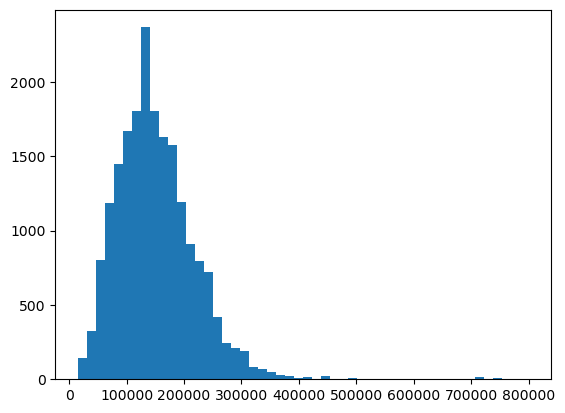

In [415]:
plt.hist(df['salary_in_usd'], bins=50)
plt.show()

Let us look at the amount of outliers in data

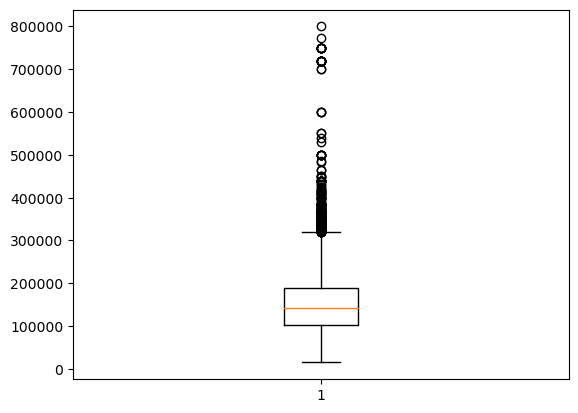

In [416]:
plt.boxplot(df['salary_in_usd'])
plt.show()

Let us find the number of outliers showing in the boxplot. These data points deviate from the rest of the normal data

In [417]:
def find_anomalities(df):
    anomality = []
    
    data_std = st.stdev(df)
    data_mean = st.mean(df)
    data_out = data_std * 3
    
    lower_limit = data_mean - data_out
    upper_limit = data_mean + data_out
    
    for outlier in df:
        if (outlier<lower_limit or outlier>upper_limit):
            anomality.append(outlier)
    
    return anomality,lower_limit,upper_limit

In [418]:
anomaly, lower_limit, upper_limit = find_anomalities(df['salary_in_usd'])
len(anomaly)

158

In [419]:
print((len(anomaly)/len(df))*100)

0.7989886219974716


Reduce the outliers or anomalies

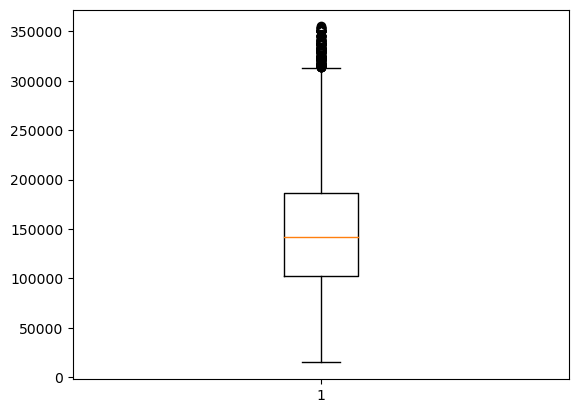

In [420]:
outliers = [i for i, x in enumerate(df['salary_in_usd']) if x < lower_limit or x > upper_limit]
df_clean = df.drop(outliers)
df = df_clean
plt.boxplot(df_clean['salary_in_usd'])
plt.show()

# Data Preprocessing

In [421]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
print(corr_matrix['salary_in_usd'].sort_values(ascending=False))

salary_in_usd    1.000000
salary           0.132992
work_year        0.078396
remote_ratio    -0.057898
Name: salary_in_usd, dtype: float64


Correlation of all numerical features look weak

In [423]:
print(df.experience_level.unique())
print(df.employment_type.unique())
print(df.company_size.unique())
print(len(df.job_title.unique()))
print(df.salary_currency.unique())

['MI' 'SE' 'EN' 'EX']
['FT' 'PT' 'CT' 'FL']
['M' 'L' 'S']
146
['USD' 'EUR' 'GBP' 'ZAR' 'CAD' 'SEK' 'PLN' 'INR' 'DKK' 'ILS' 'BRL' 'CHF'
 'NZD' 'AUD' 'PHP' 'TRY' 'NOK' 'JPY' 'HKD' 'SGD' 'THB' 'HUF' 'MXN' 'CLP']


In [424]:
X = df[['experience_level','employment_type','company_size']]
y = df[['salary_in_usd']]

In [425]:
y

,salary_in_usd
0,84021
1,69000
2,241600
3,109800
4,245400
...,...
19769,165000
19771,151000
19772,105000
19773,100000


In [426]:
scaler_linear = StandardScaler()
y_scaled = scaler_linear.fit_transform(y)

Using One hot encoding

In [427]:
df_ohe = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'company_size'])

le = LabelEncoder()
job_title_encoded = le.fit_transform(df_ohe['job_title'])
df_ohe['job_title_encoded'] = job_title_encoded

salary_currency_encoded = le.fit_transform(df_ohe['salary_currency'])
df_ohe['salary_currency_encoded'] = salary_currency_encoded

Using Label Encoding

In [428]:
job_title_s = scaler_linear.fit_transform(job_title_encoded.reshape(-1,1))
salary_currency_s = scaler_linear.fit_transform(salary_currency_encoded.reshape(-1,1))

df_ohe['job_title_s'] = job_title_s
df_ohe['salary_currency_s'] = salary_currency_s

Scaling the features

In [429]:
X = df_ohe[['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
             'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
             'company_size_L', 'company_size_M', 'company_size_S','job_title_s','salary_currency_s']]

X.head()

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S,job_title_s,salary_currency_s
0,False,False,True,False,False,False,True,False,False,True,False,-1.276624,0.268195
1,False,False,True,False,False,False,True,False,False,True,False,-1.276624,0.268195
2,False,False,False,True,False,False,True,False,False,True,False,-1.463127,0.268195
3,False,False,False,True,False,False,True,False,False,True,False,-1.463127,0.268195
4,False,False,False,True,False,False,True,False,False,True,False,1.334415,0.268195


X is created and y is created too

In [430]:
X_train, x_, y_train, y_ = train_test_split(X, y_scaled, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=42)

del x_,y_

Splits the dataset into 70-15-15. 70 for training, 15 for cross validation and 15 for testing

# Models

## 1. Multiple Regression

In [431]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

Creates a instance of LinearRegression, and fit trains the data by computing w and b parameters and reducing it by gradient descent

In [432]:
yhat1 = linear.predict(X_cv)

yhat2 = linear.predict(X_test)

Model predicts the value by the training it got above

In [433]:
mse1 = (mean_squared_error(y_cv,yhat1))
mse2 = (mean_squared_error(y_test,yhat2))

print(f"Cross Validation Mean Square Error is: {mse1}")
print(f"Test Mean Square Error is: {mse2}")

Cross Validation Mean Square Error is: 0.7326770313420382
Test Mean Square Error is: 0.7202497715549385


In [434]:
r1 = (r2_score(y_cv,yhat1))
r2 = (r2_score(y_test,yhat2))

print(f"Cross Validation R-Squared is: {r1}")
print(f"Test R-Squared is: {r2}")

Cross Validation R-Squared is: 0.26876899770259755
Test R-Squared is: 0.26388431348610353


## 2. Decision Trees

In [435]:
model2 = DecisionTreeRegressor()

model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [436]:
yhat3 = model2.predict(X_cv)

yhat4 = model2.predict(X_test)

In [437]:
mse3 = (mean_squared_error(y_cv,yhat3))
mse4 = (mean_squared_error(y_test,yhat4))

print(f"Cross Validation MSE is: {mse3}")
print(f"Test dataset MSE is: {mse4}")

Cross Validation MSE is: 0.6513168033203495
Test dataset MSE is: 0.6401703264940972


In [438]:
r3 = (r2_score(y_cv,yhat3))
r4 = (r2_score(y_test,yhat4))

print(f"Cross Validation R-Squared is: {r3}")
print(f"Test R-Squared is: {r4}")

Cross Validation R-Squared is: 0.34996865121769627
Test R-Squared is: 0.3457277766910296


### Decision trees are wroking better than Linear Regression/Multiple Regression

## 3. Random Forests

In [439]:
model3 = RandomForestRegressor()

model3.fit(X_train,y_train.ravel())

RandomForestRegressor()

In [440]:
yhat5 = model3.predict(X_cv)

yhat6 = model3.predict(X_test)

In [441]:
mse5 = (mean_squared_error(y_cv,yhat5))
mse6 = (mean_squared_error(y_test,yhat6))

print(f"Cross Validation MSE is: {mse5}")
print(f"Test dataset MSE is: {mse6}")

Cross Validation MSE is: 0.6452543018159669
Test dataset MSE is: 0.6318079670230938


In [442]:
r5 = (r2_score(y_cv,yhat5))
r6 = (r2_score(y_test,yhat6))

print(f"Cross Validation R-Squared is: {r5}")
print(f"Test R-Squared is: {r6}")

Cross Validation R-Squared is: 0.35601918762301965
Test R-Squared is: 0.35427434515377865


### Random forests work slightly better than Decision Trees, but much better than Linear regression

## 4. Gradient Boosting Regressor

In [443]:
model4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

In [444]:
model4.fit(X_train,y_train.ravel())

GradientBoostingRegressor(max_depth=5)

In [445]:
yhat7 = model4.predict(X_cv)
yhat8 = model4.predict(X_test)

In [446]:
mse7 = (mean_squared_error(y_cv,yhat7))
mse8 = (mean_squared_error(y_test,yhat8))

print(f"Cross Validation MSE is: {mse7}")
print(f"Test dataset MSE is: {mse8}")

Cross Validation MSE is: 0.6389191626500321
Test dataset MSE is: 0.6334999147983489


In [447]:
r7 = (r2_score(y_cv,yhat7))
r8 = (r2_score(y_test,yhat8))

print(f"Cross Validation R-Squared is: {r7}")
print(f"Test R-Squared is: {r8}")

Cross Validation R-Squared is: 0.3623418236056364
Test R-Squared is: 0.3525451265586256


### Random Forests and Gradient Boosting Regressor works almost in the same manner

### Random Forests and Gradient Boosting Regressor are best suited for this non-linear relationship of dataset. Using Mean Square error and R squared error, we are able to get to this conclusion